In [39]:
#Fill these file paths with the locations on your machine. 
PATH_TO_CODE = r'C:\Projet_MA1\ML_projet_CNN\projet_cnn'  # path to the code folder of the repo
PATH_TO_IN = r'C:\Projet_MA1\ML_projet_CNN\projet_cnn\data_sub\train_input'
PATH_TO_MASK = r'C:\Projet_MA1\ML_projet_CNN\projet_cnn\data_sub\train_mask'



import sys
sys.path.append(PATH_TO_CODE)


import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
import os

cm = matplotlib.cm.get_cmap('tab20')
def_colors = cm.colors
cus_colors = ['k'] + [def_colors[i] for i in range(1,20)]+['w']
cmap = ListedColormap(colors = cus_colors, name='agri',N=21)

def get_rgb(x, batch_index=0, t_show=1):
    """Utility function to get a displayable rgb image 
    from a Sentinel-2 time series.
    """
    im = x['S2'][batch_index, t_show, [2,1,0]].cpu().numpy()
    mx = im.max(axis=(1,2))
    mi = im.min(axis=(1,2))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

def get_radar(x, batch_index=0, t_show=6, orbit='D'):
    """Utility function to get a displayable image 
    from a Sentinel-1 time series.
    """
    im = x['S1{}'.format(orbit)][batch_index, t_show].cpu().numpy()
    mx = im.max(axis=(1,2))
    mi = im.min(axis=(1,2))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

In [33]:
from dataset import YeastDataset


dt = YeastDataset(PATH_TO_IN,PATH_TO_MASK)
# If you only need to evaluate semantic segmentation use target='semantic'

dl = torch.utils.data.DataLoader(dt, batch_size=9, shuffle=True)

In [34]:
(x, dates), y = dl.__iter__().__next__()
print(x.shape)
print(dates.shape)
print(y.shape)
print(y[0].shape)

torch.Size([4, 3, 3, 256, 256])
torch.Size([4, 3])
torch.Size([4, 256, 256])
torch.Size([256, 256])


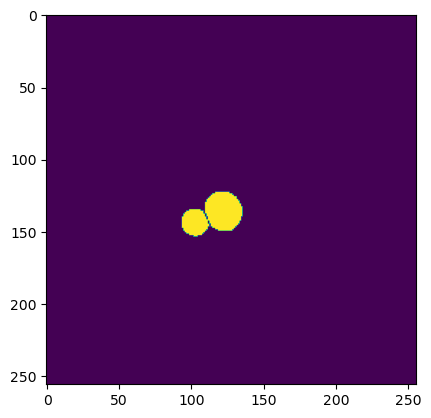

In [38]:
plt.imshow(y[3])

In [40]:
from model import UTAE
from weight_init import weight_init
device = torch.device('cpu')
model = UTAE(input_dim=3).to(device)
model.apply(weight_init)

model.load_state_dict(
            torch.load(
                os.path.join(
                    "result/" , "model.pth.tar"
                )
            )["state_dict"]
        )

<All keys matched successfully>

In [ ]:
model.eval()
